# Fuel Efficiency Prediction for Cars(using Regression)

Predicting the fuel efficiency(Miles per Gallon) of Vintage cars.

### Importing Modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sb
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
autr = pd.read_csv("auto-mpg (1).data", sep = '\s+', header = None)
autr.rename(columns = {0 : 'mpg', 1: 'cylinders', 2:'displacement', 3:'hp', 4:'weight', 5:'acceleration', 6:'modelyear', 7:'origin', 8:'carname'}, inplace = True)

In [5]:
autr.dtypes
autr

,mpg,cylinders,displacement,hp,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


Displacement in cubic inches, Weight in pounds, Acceleration in seconds

### Data Cleaning

In [6]:
autr.hp = pd.to_numeric(autr.hp, downcast = 'float', errors = 'coerce')

In [7]:
autr.dtypes

mpg             float64
cylinders         int64
displacement    float64
hp              float32
weight          float64
acceleration    float64
modelyear         int64
origin            int64
carname          object
dtype: object

In [8]:
orig = {1 : 'America', 2 : 'Europe', 3 : 'Japan'}
autr['origin'] = autr['origin'].map(orig)
autr

,mpg,cylinders,displacement,hp,weight,acceleration,modelyear,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,America,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,America,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,America,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,America,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,America,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,America,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,America,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,America,ford ranger


Variables are converted into accessible format.

In [9]:
autr.isna().sum()


mpg             0
cylinders       0
displacement    0
hp              6
weight          0
acceleration    0
modelyear       0
origin          0
carname         0
dtype: int64

In [10]:
autr.dropna(axis = 0, inplace = True)
autr.shape

(392, 9)

Null values are dropped.

In [11]:
autr.drop_duplicates().shape

(392, 9)

In [12]:
dummy = pd.get_dummies(autr.origin, drop_first = True)
dummy

,Europe,Japan
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
393,0,0
394,1,0
395,0,0
396,0,0


Dummy variables are created for Country names.

In [13]:
autr = pd.concat([autr, dummy], axis = 1)
autr['old'] = 2022 - (autr['modelyear'] + 1900)
autr.drop(['modelyear'], axis = 1, inplace = True)

Model Year in year format is converted into age of the car.

### Univariate Analysis

In [14]:
autr.describe()

,mpg,cylinders,displacement,hp,weight,acceleration,Europe,Japan,old
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469391,2977.584184,15.541327,0.173469,0.201531,46.020408
std,7.805007,1.705783,104.644004,38.491158,849.402560,2.758864,0.379136,0.401656,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,0.000000,0.000000,40.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,0.000000,0.000000,43.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,0.000000,0.000000,46.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,0.000000,0.000000,49.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,1.000000,1.000000,52.000000


Text(0.5, 1.0, 'Number of Cylinders(Discrete variable distribution)')

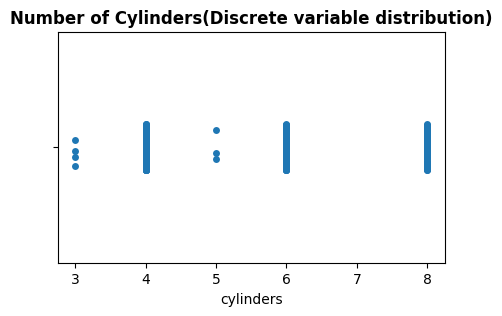

In [15]:
plt.figure(figsize=(5,3))
sb.stripplot(autr.cylinders, orient = 'h')
plt.title('Number of Cylinders(Discrete variable distribution)', fontweight = 'bold')

Text(0.5, 1.0, 'Acceleration')

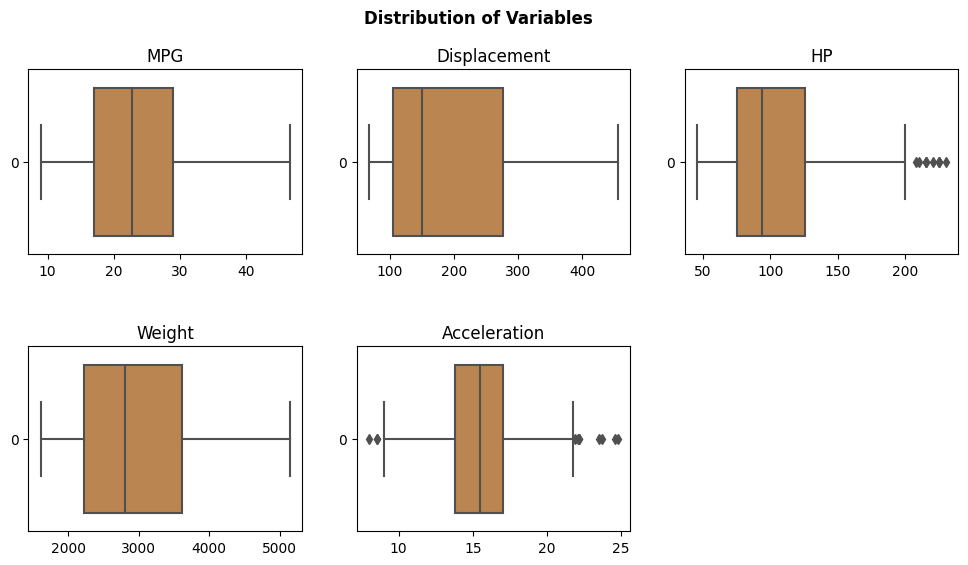

In [16]:
plt.figure(figsize = (12,6))
plt.suptitle("Distribution of Variables", fontweight= 'bold')
plt.subplots_adjust(hspace = 0.5)
plt.subplot(231)
sb.boxplot(autr.mpg, orient = 'h', color = 'peru').set_title('MPG')
plt.subplot(232)
sb.boxplot(autr.displacement, orient = 'h', color = 'peru').set_title('Displacement')
plt.subplot(233)
sb.boxplot(autr.hp, orient = 'h', color = 'peru').set_title('HP')
plt.subplot(234)
sb.boxplot(autr.weight, orient = 'h', color = 'peru').set_title('Weight')
plt.subplot(235)
sb.boxplot(autr.acceleration, orient = 'h', color = 'peru').set_title('Acceleration')

<AxesSubplot: xlabel='hp'>

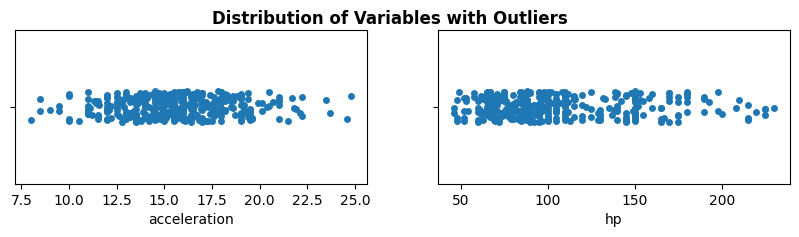

In [17]:
plt.figure(figsize=(10,2))
plt.suptitle('Distribution of Variables with Outliers', fontweight = 'bold')
plt.subplot(121)
sb.stripplot(x = autr.acceleration)
plt.subplot(122)
sb.stripplot(x = autr.hp)

In [18]:
def iqroutlier(data):
    sordata = sorted(data)
    q1, q3 = np.percentile(sordata, [25,75])
    iqr = q3 - q1
    lowfence = q1 - (1.5 * iqr)
    upfence = q3 + (1.5 * iqr)
    print('Outliers from the given data are')
    for i in sordata:
        if i > upfence or i < lowfence:
            print(i)
    
            
iqroutlier(autr.hp)

iqroutlier(autr.acceleration)

Outliers from the given data are
208.0
210.0
215.0
215.0
215.0
220.0
225.0
225.0
225.0
230.0
Outliers from the given data are
8.0
8.5
8.5
21.9
22.1
22.2
22.2
23.5
23.7
24.6
24.8


In [19]:
autr[autr['hp'] < 207.9]

,mpg,cylinders,displacement,hp,weight,acceleration,origin,carname,Europe,Japan,old
0,18.0,8,307.0,130.0,3504.0,12.0,America,chevrolet chevelle malibu,0,0,52
1,15.0,8,350.0,165.0,3693.0,11.5,America,buick skylark 320,0,0,52
2,18.0,8,318.0,150.0,3436.0,11.0,America,plymouth satellite,0,0,52
3,16.0,8,304.0,150.0,3433.0,12.0,America,amc rebel sst,0,0,52
4,17.0,8,302.0,140.0,3449.0,10.5,America,ford torino,0,0,52
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,America,ford mustang gl,0,0,40
394,44.0,4,97.0,52.0,2130.0,24.6,Europe,vw pickup,1,0,40
395,32.0,4,135.0,84.0,2295.0,11.6,America,dodge rampage,0,0,40
396,28.0,4,120.0,79.0,2625.0,18.6,America,ford ranger,0,0,40


In [20]:
autr[(autr['acceleration']> 21.8) | (autr['acceleration']<8.6)]

,mpg,cylinders,displacement,hp,weight,acceleration,origin,carname,Europe,Japan,old
7,14.0,8,440.0,215.0,4312.0,8.5,America,plymouth fury iii,0,0,52
9,15.0,8,390.0,190.0,3850.0,8.5,America,amc ambassador dpl,0,0,52
11,14.0,8,340.0,160.0,3609.0,8.0,America,plymouth 'cuda 340,0,0,52
59,23.0,4,97.0,54.0,2254.0,23.5,Europe,volkswagen type 3,1,0,50
195,29.0,4,85.0,52.0,2035.0,22.2,America,chevrolet chevette,0,0,46
196,24.5,4,98.0,60.0,2164.0,22.1,America,chevrolet woody,0,0,46
209,19.0,4,120.0,88.0,3270.0,21.9,Europe,peugeot 504,1,0,46
299,27.2,4,141.0,71.0,3190.0,24.8,Europe,peugeot 504,1,0,43
300,23.9,8,260.0,90.0,3420.0,22.2,America,oldsmobile cutlass salon brougham,0,0,43
326,43.4,4,90.0,48.0,2335.0,23.7,Europe,vw dasher (diesel),1,0,42


However, HP and Acceleration has outliers, we keep them as those are real oultiers/actual values.

Text(0.5, 1.0, 'Cars per Country')

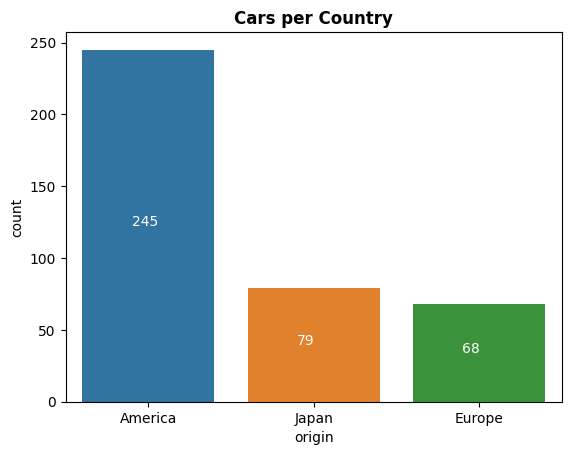

In [21]:
coun = sb.countplot(x =autr.origin)
for i in coun.patches:
    coun.text(i.get_x()+0.3, i.get_height()/2, str(round(i.get_height())), color = 'white')
plt.title("Cars per Country", fontweight = 'bold')

American origin cars are largely distributed followed by Japan and Europe

Text(0.5, 1.0, 'DISTRIBUTION OF DEPENDENT VARIABLE')

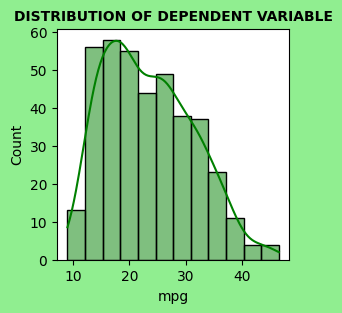

In [22]:
plt.figure(figsize = (3,3), facecolor = 'lightgreen')

sb.histplot(autr.mpg, color = 'g', kde = True)
plt.title('DISTRIBUTION OF DEPENDENT VARIABLE', fontweight = 'bold', size = 10)


Dependent Variable is right-skewed.

Text(0.5, 1.0, 'Accelertion')

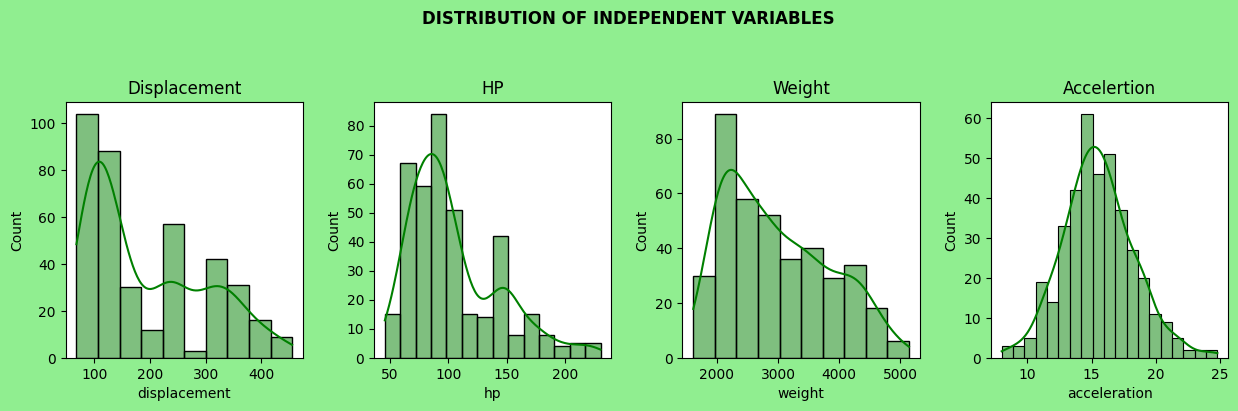

In [23]:
plt.figure(figsize=(15,4), facecolor = 'lightgreen')
plt.suptitle('DISTRIBUTION OF INDEPENDENT VARIABLES', fontweight = 'bold')
plt.subplots_adjust(top = 0.75, wspace = 0.3)

plt.subplot(141)
sb.histplot(autr.displacement, color = 'g', kde = True)
plt.title('Displacement')

plt.subplot(142)
sb.histplot(autr.hp, color = 'g', kde = True)
plt.title('HP')

plt.subplot(143)
sb.histplot(autr.weight, color = 'g', kde = True)
plt.title('Weight')

plt.subplot(144)
sb.histplot(autr.acceleration, color = 'g', kde = True)
plt.title('Accelertion')


All other variables are skewed and abnormally distributed except Acceleration which is normally distributed.

### Bivariate Analysis

Text(0.5, 1.0, 'Relationship between Miles per Gallon & Number of Cylinders')

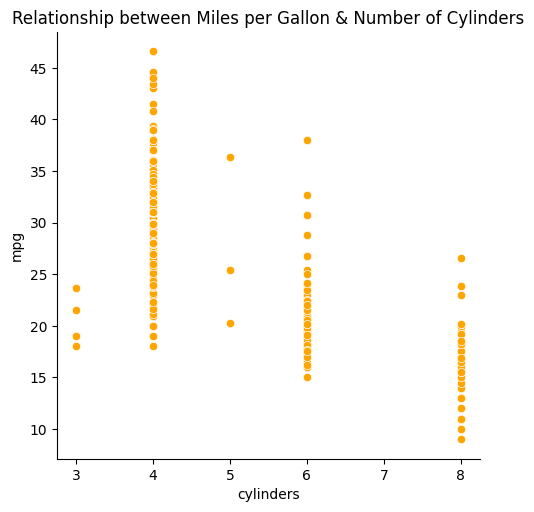

In [24]:
sb.relplot(y = 'mpg', x = 'cylinders', data = autr, color = 'orange')
plt.title('Relationship between Miles per Gallon & Number of Cylinders')

Text(0.5, 1.0, 'Relationship between Miles per Gallon & Displacement')

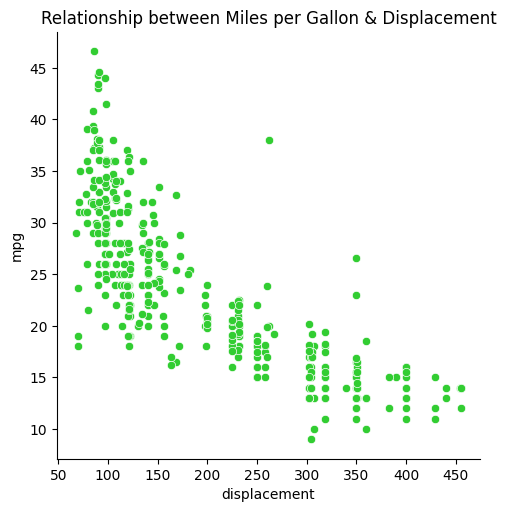

In [25]:
sb.relplot(y = 'mpg', x = 'displacement', data = autr, color = 'limegreen')
plt.title('Relationship between Miles per Gallon & Displacement')

Text(0.5, 1.0, 'Relationship between Miles per Gallon & HP')

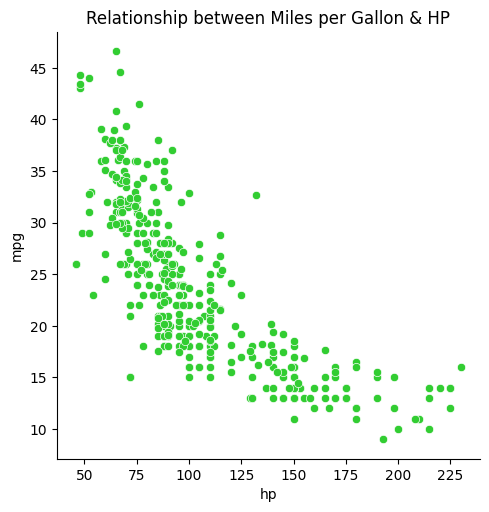

In [26]:
sb.relplot(y = 'mpg', x = 'hp', data = autr, color = 'limegreen')
plt.title('Relationship between Miles per Gallon & HP')

Text(0.5, 1.0, 'Relationship between Miles per Gallon & Weight of the car')

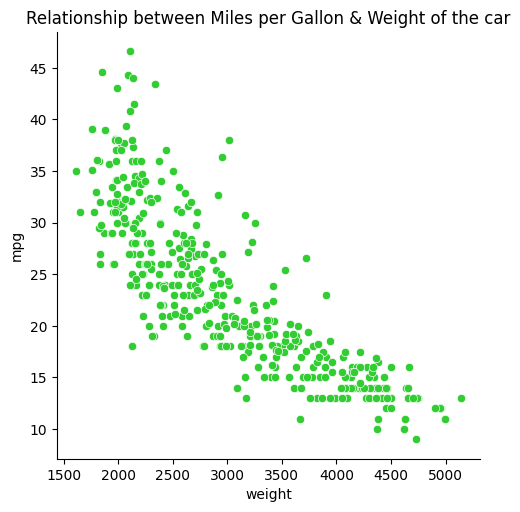

In [27]:
sb.relplot(y = 'mpg', x = 'weight', data = autr, color = 'limegreen')
plt.title('Relationship between Miles per Gallon & Weight of the car')

Text(0.5, 1.0, 'Relationship between Miles per Gallon & Acceleration')

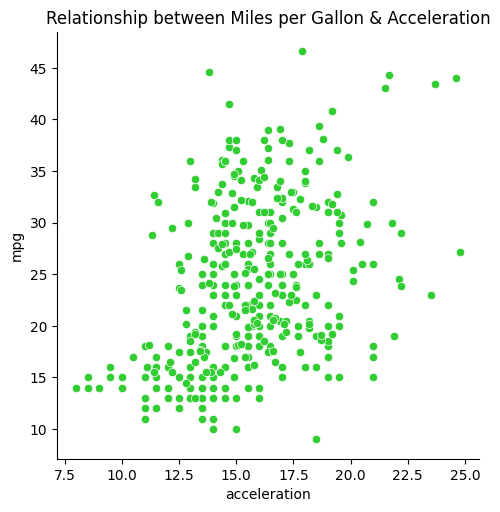

In [28]:
sb.relplot(y = 'mpg', x = 'acceleration', data = autr, color = 'limegreen')
plt.title('Relationship between Miles per Gallon & Acceleration')

In [29]:
mdis = round((autr[['displacement', 'mpg']].corr().loc['displacement', 'mpg']),3)
mhp = round((autr[['hp', 'mpg']].corr().loc['hp', 'mpg']),3)
mwei = round((autr[['weight', 'mpg']].corr().loc['weight', 'mpg']),3)
macc = round((autr[['acceleration', 'mpg']].corr().loc['acceleration', 'mpg']),3)

Text(8, 39, 'Correlation\nCoefficient :\n0.423')

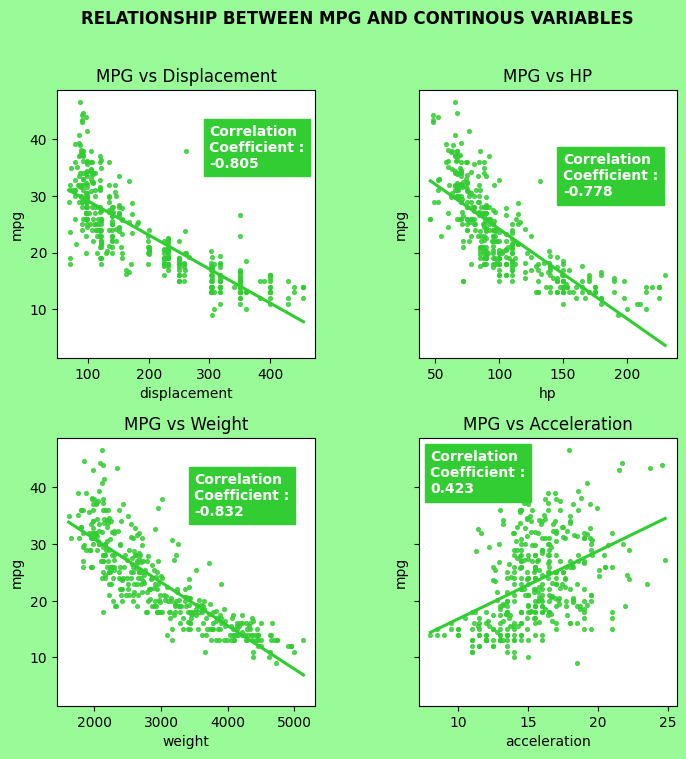

In [30]:
fig,axs = plt.subplots(2,2, figsize=(8,8), sharey = True)
fig.suptitle('RELATIONSHIP BETWEEN MPG AND CONTINOUS VARIABLES', fontweight = 'bold')
plt.subplots_adjust(hspace = 0.3, wspace = 0.4)
fig.set_facecolor('palegreen')

sb.regplot(ax= axs[0,0],x = autr.displacement, y = autr.mpg , color = 'limegreen', ci = None, scatter_kws = dict(s = 7.5)).set_title('MPG vs Displacement')
axs[0,0].text(300, 35, 'Correlation\nCoefficient :\n%s'%mdis, fontdict = dict(backgroundcolor = 'limegreen', color = 'white', fontweight = 'bold'))

sb.regplot(ax= axs[0,1], x = autr.hp, y = autr.mpg, color = 'limegreen', ci = None, scatter_kws = dict(s = 7.5)).set_title('MPG vs HP')
axs[0,1].text(150,30, 'Correlation\nCoefficient :\n%s'%mhp, fontdict = dict(backgroundcolor = 'limegreen', color = 'white', fontweight = 'bold'))

sb.regplot(ax = axs[1,0], y= autr.mpg, x = autr.weight, color = 'limegreen', ci = None, scatter_kws = dict(s = 7.5)).set_title('MPG vs Weight')
axs[1,0].text(3500,35, 'Correlation\nCoefficient :\n%s'%mwei, fontdict = dict(backgroundcolor = 'limegreen', color = 'white', fontweight = 'bold'))

sb.regplot(ax = axs[1,1], y= autr.mpg, x = autr.acceleration, color = 'limegreen', ci = None, scatter_kws = dict(s = 7.5)).set_title('MPG vs Acceleration')
axs[1,1].text(8,39, 'Correlation\nCoefficient :\n%s'%macc, fontdict = dict(backgroundcolor = 'limegreen', color = 'white', fontweight = 'bold'))


Its clear that the Independent Variable Weight have highest negative correlation with Dependent Variable.

<AxesSubplot: xlabel='old', ylabel='mpg'>

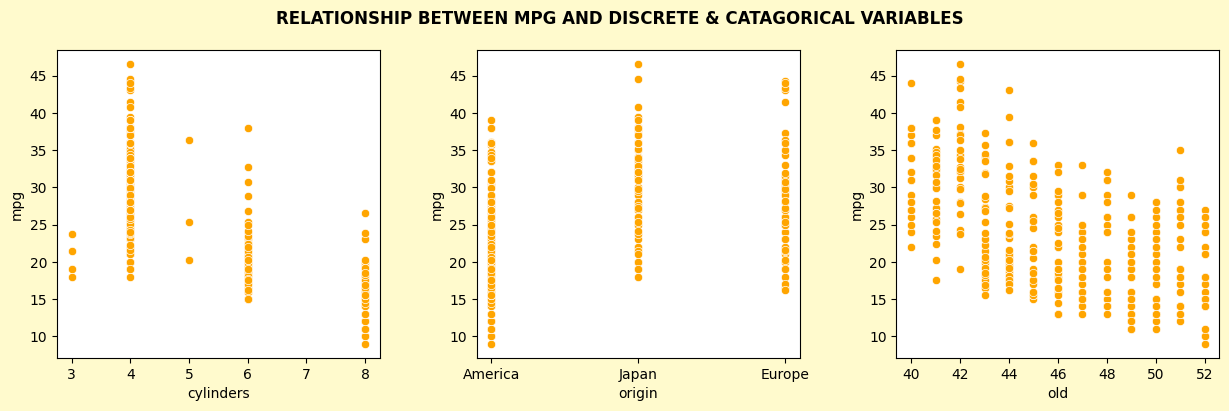

In [31]:
plt.figure(figsize=(15,4), facecolor = 'lemonchiffon')
plt.suptitle('RELATIONSHIP BETWEEN MPG AND DISCRETE & CATAGORICAL VARIABLES', fontweight = 'bold')
plt.subplots_adjust(wspace = 0.3)

plt.subplot(131)
sb.scatterplot(y = autr.mpg, x = autr.cylinders, color  = 'orange')

plt.subplot(132)
sb.scatterplot(y = autr.mpg, x = autr.origin, color  = 'orange')

plt.subplot(133)
sb.scatterplot(y = autr.mpg, x = autr.old, color  = 'orange')

### Multivariate Analysis

<AxesSubplot: >

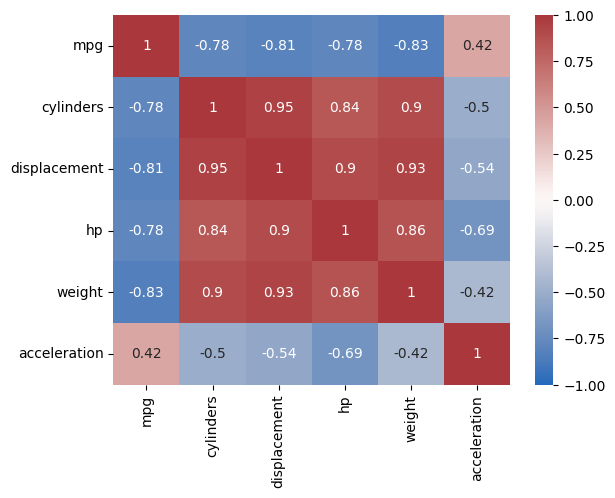

In [32]:
sb.heatmap(autr.iloc[0:, 0:6].corr(), annot = True, cmap = 'vlag',vmax = 1, vmin = -1)

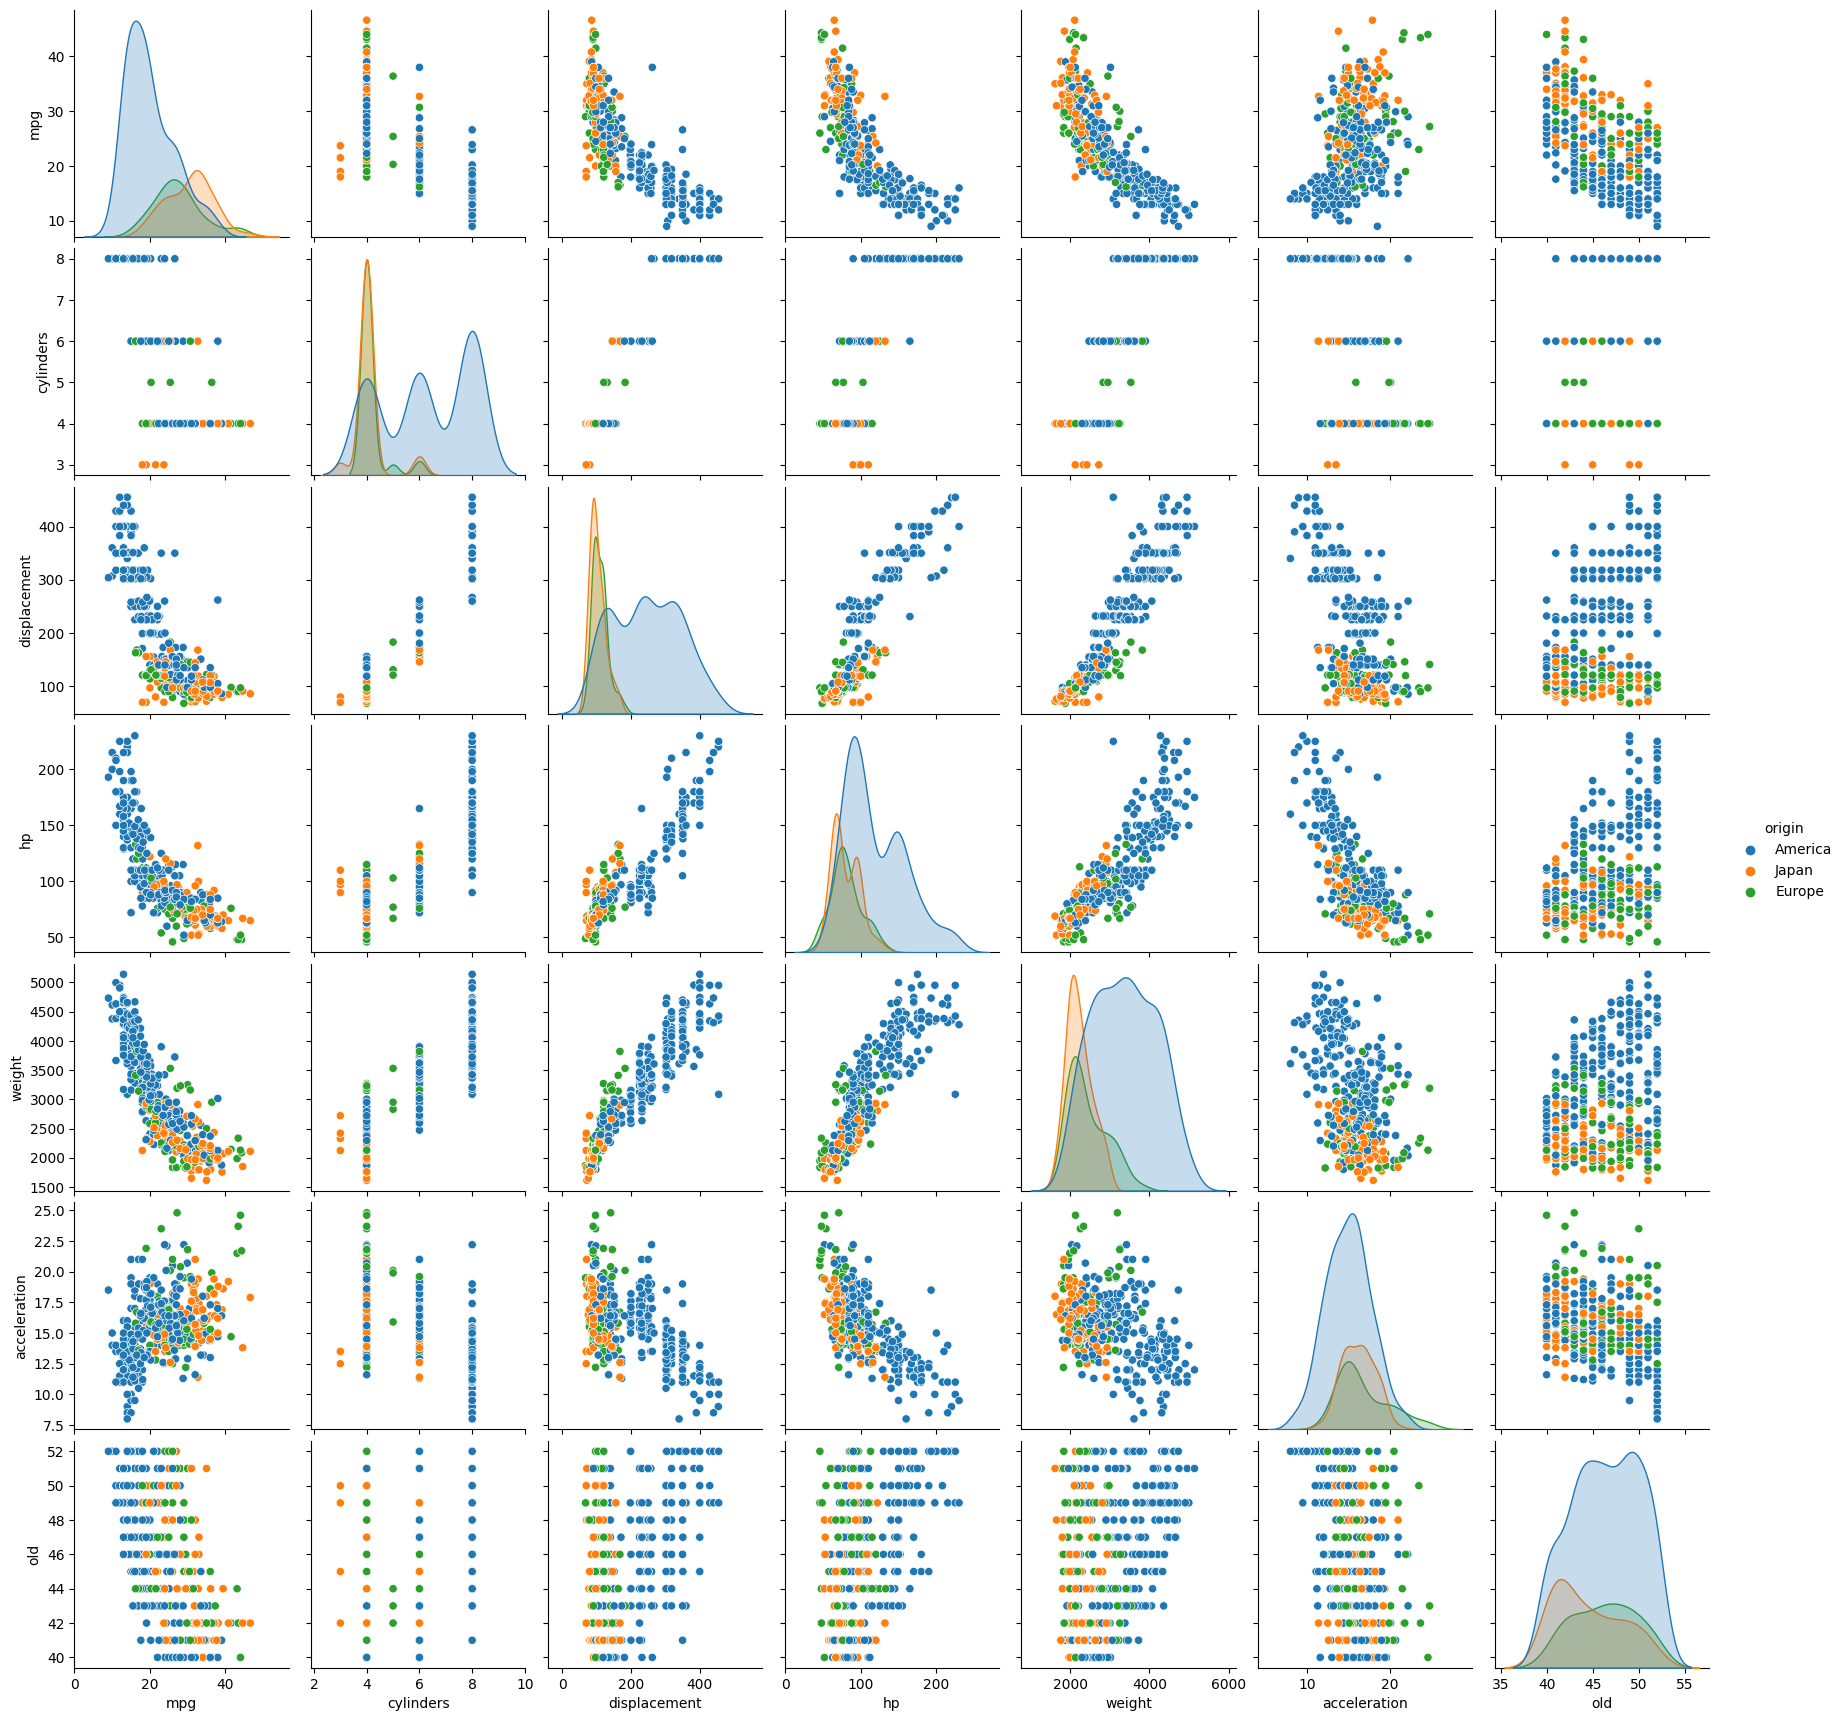

In [33]:
sb.pairplot(autr.drop(['Europe', 'Japan'], axis = 1), hue = 'origin')

Multicollinearity exists in the dataset. There is a strong positive correlation between Displacement and No of Cylinders(Infact Engine Displacement and No of Cylinders are interchangable as per the domain knowledge). Displacement has strong positive correlation with other Independent Variables. So we can drop the variable Displacement.

Though there are correlation between other Independent variables, we are not going to drop it. If we do so, we are going to lose more data.

In [34]:
x = autr.drop(columns=['origin', 'carname', 'mpg', 'displacement'], axis = 1 )
y = autr.mpg

Dataset is splitted into Dependent and Independent Variables

### Train Test Split

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 34)
print("The shape of the train dataset is {} rows and {} columns".format(X_train.shape[0], X_train.shape[1]))
print("The shape of the test dataset is {} rows and {} columns".format(X_test.shape[0], X_train.shape[1]))

X_train = mms.fit_transform(X_train)
X_test = mms.transform(X_test)

The shape of the train dataset is 313 rows and 7 columns
The shape of the test dataset is 79 rows and 7 columns


Independent Variables are Normalized using MinMax Scaler.

### 1) Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

linreg = LinearRegression()
linreg.fit(X_train, y_train)
cvsco = cross_val_score(linreg, X_train, y_train, scoring = 'r2', cv = 5)
cvsco.mean()

0.8205523091304148

In [37]:
ytrainpred = linreg.predict(X_train)
ytestpred = linreg.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lintestscore = r2_score(y_test, ytestpred)
lintrainscore = r2_score(y_train, ytrainpred)
print("The Train score(R2) for Linear Regression is {}".format(lintrainscore))
print("The Test score(R2) for Linear Regression is {}".format(lintestscore))

The Train score(R2) for Linear Regression is 0.8227023592663189
The Test score(R2) for Linear Regression is 0.803502244729005


In [39]:
linmse = mean_squared_error(y_test, ytestpred)
linmae = mean_absolute_error(y_test, ytestpred)
print("Mean Squared Error(MSE) of Linear Regression is {}".format(linmse))
print("Mean Absolute Error(MAE) of Linear Regression is {}".format(linmae))

Mean Squared Error(MSE) of Linear Regression is 11.598626182216933
Mean Absolute Error(MAE) of Linear Regression is 2.623943318566928


In [40]:
print(linreg.intercept_,linreg.coef_)

34.963905099386466 [  0.20523028  -0.56033044 -20.47067807   0.16729449   2.23821827
   2.54791817  -8.8940117 ]


### 2) Ridge Regression

In [41]:
ridcv = RidgeCV(alphas = [0.00001,0.0001,0.0001,0.001,0.01,0.1,1,10,100]).fit(X_train,y_train)
print("Cross Validation score for Ridge regression is %f"%ridcv.score(X_train,y_train))
print("Ideal Alpha value for this Ridge regession is %s"%ridcv.alpha_)

Cross Validation score for Ridge regression is 0.822608
Ideal Alpha value for this Ridge regession is 0.1


In [42]:
ridgereg = Ridge(alpha = 0.1)
ridgereg.fit(X_train, y_train)
ridtrainpred = ridgereg.predict(X_train)
ridtestpred = ridgereg.predict(X_test)

ridtrainscore = ridgereg.score(X_train,y_train)
ridtestscore = ridgereg.score(X_test,y_test)
print("The Test Score(R2) for Ridge regression is %f" %ridtestscore)
print("The Train Score(R2) of Ridge regression is %f" %ridtrainscore)

The Test Score(R2) for Ridge regression is 0.803076
The Train Score(R2) of Ridge regression is 0.822608


In [43]:
ridmse = mean_squared_error(y_test, ridtestpred)
ridmae = mean_absolute_error(y_test, ridtestpred)
print("Mean Squared Error(MSE) of Ridge Regression is {}".format(ridmse))
print("Mean Absolute Error(MAE) of Ridge Regression is {}".format(ridmae))

Mean Squared Error(MSE) of Ridge Regression is 11.623768891848904
Mean Absolute Error(MAE) of Ridge Regression is 2.628837818926524


In [44]:
print(ridgereg.intercept_, ridgereg.coef_)

35.06202835781042 [ -0.13530416  -1.21473153 -19.52741561  -0.14543125   2.23663431
   2.59685046  -8.81011385]


### 3) Lasso Regression

In [45]:
lascv = LassoCV(alphas = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]).fit(X_train,y_train)
print("Cross-Validation score for Lasso regression is %f"%lascv.score(X_train,y_train))
print("Ideal Alpha value for this Lasso regression is %s"%lascv.alpha_)

Cross-Validation score for Lasso regression is 0.822626
Ideal Alpha value for this Lasso regression is 0.01


In [46]:
lassoreg = Lasso(alpha = 0.01)
lassoreg.fit(X_train, y_train)
lassotrainpred = lassoreg.predict(X_train)
lassotestpred = lassoreg.predict(X_test)

lastrainscore = lassoreg.score(X_train,y_train)
lastestscore = lassoreg.score(X_test,y_test)
print("The Test Score(R2) for Lasso regression is %f" %lastestscore)
print("The Train Score(R2) of Lasso regression is %f" %lastrainscore)


The Test Score(R2) for Lasso regression is 0.802859
The Train Score(R2) of Lasso regression is 0.822626


In [47]:
lasmse = mean_squared_error(y_test, lassotestpred)
lasmae = mean_absolute_error(y_test, lassotestpred)
print("Mean Absolute Error(MAE) of Lasso Regression is {}".format(lasmae))
print("Mean Squared Error(MSE) of Lasso Regression is {}".format(lasmse))

Mean Absolute Error(MAE) of Lasso Regression is 2.62105160908396
Mean Squared Error(MSE) of Lasso Regression is 11.63658757151165


In [48]:
print(lassoreg.intercept_, lassoreg.coef_)

35.02576689469386 [ -0.07227419  -0.43709361 -20.21163583   0.           2.1396277
   2.4791318   -8.81476165]


### Residual Distribution Plot

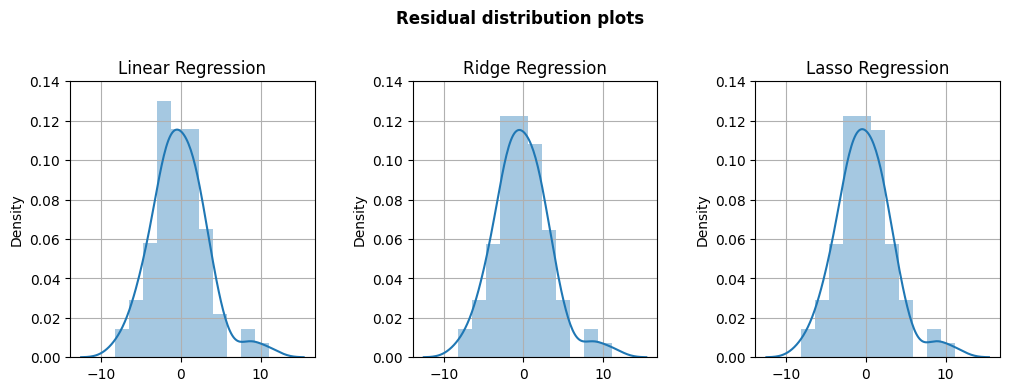

In [49]:
fig,axs = plt.subplots(1,3, figsize = (12,4))
fig.suptitle('Residual distribution plots', fontweight = 'bold')
plt.subplots_adjust(top = 0.8 , wspace = 0.4)
sb.distplot(ax = axs[1], x= (y_test - ridtestpred)).set_title('Ridge Regression')
axs[1].yaxis.set_ticks(np.arange(0.00, 0.14, 0.02))
sb.distplot(ax = axs[2], x= (y_test - lassotestpred)).set_title('Lasso Regression')
axs[2].yaxis.set_ticks(np.arange(0.00, 0.14, 0.02))
sb.distplot(ax = axs[0], x= (y_test - ytestpred)).set_title('Linear Regression')
axs[0].yaxis.set_ticks(np.arange(0.00, 0.14, 0.02))
axs[0].grid()
axs[1].grid()
axs[2].grid()

Text(0.5, 1.0, 'Lasso Regression')

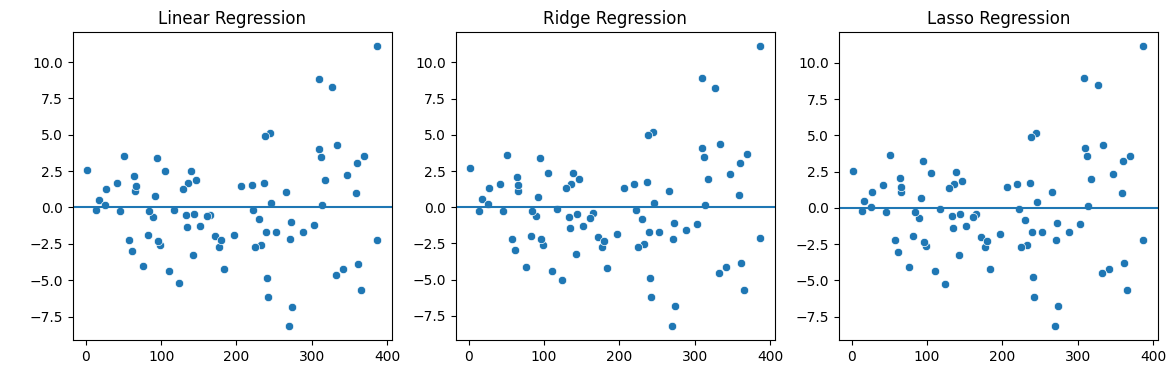

In [50]:
plt.figure(figsize=(14,4))
plt.subplot(131)
plt.ylabel(' ')
sb.scatterplot((y_test - ytestpred)).axhline(0)
plt.title('Linear Regression')
plt.subplot(132)
plt.ylabel(' ')
sb.scatterplot((y_test - ridtestpred)).axhline(0)
plt.title('Ridge Regression')
plt.subplot(133)
plt.ylabel(' ')
sb.scatterplot((y_test - lassotestpred)).axhline(0)
plt.title('Lasso Regression')

Residuals from all the models are normally distributed.

### Relationship between Actual values and Predicted values

Text(0.5, 0, 'Actual values')

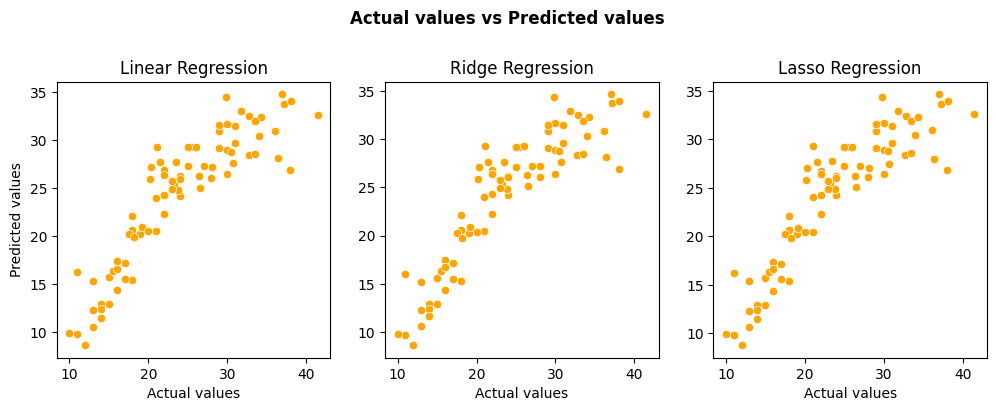

In [51]:
fig, axs = plt.subplots(1,3, figsize = (12,4))
fig.suptitle('Actual values vs Predicted values', fontweight = 'bold')
plt.subplots_adjust(top = 0.8)
sb.scatterplot(ax = axs[0], x= y_test, y= ytestpred, color = 'orange').set_title('Linear Regression')
axs[0].set_xlabel('Actual values')
axs[0].set_ylabel('Predicted values')
sb.scatterplot(ax = axs[1], x= y_test, y= ridtestpred, color = 'orange').set_title('Ridge Regression')
axs[1].set_xlabel('Actual values')
sb.scatterplot(ax = axs[2], x= y_test, y= lassotestpred, color = 'orange').set_title('Lasso Regression')
axs[2].set_xlabel('Actual values')

### Comparing the Scores and Errors

In [52]:
score = pd.DataFrame({'Linear_Regression' : [lintestscore, lintrainscore, linmse, linmae, np.sqrt(linmse)],
                      'Ridge_Regression' : [ridtestscore, ridtrainscore, ridmse, ridmae, np.sqrt(ridmse)],
                      'Lasso_Regression' : [lastestscore, lastrainscore, lasmse, lasmae, np.sqrt(lasmse)]}, 
                      index = ['Test_score', 'Train_score', 'Mean_Squared_Error', 'Mean_Absolute_Error', 'RMSE'])
scores = score.T
scores

,Test_score,Train_score,Mean_Squared_Error,Mean_Absolute_Error,RMSE
Linear_Regression,0.803502,0.822702,11.598626,2.623943,3.405676
Ridge_Regression,0.803076,0.822608,11.623769,2.628838,3.409365
Lasso_Regression,0.802859,0.822626,11.636588,2.621052,3.411244


### Comparing the Coefficients

In [53]:
coefs = pd.DataFrame({'Linear_reg_coefs' : np.append(linreg.intercept_, linreg.coef_),
             'Ridge_reg_coefs' : np.append(ridgereg.intercept_, ridgereg.coef_),
             'Lasso_reg_coefs' : np.append(lassoreg.intercept_, lassoreg.coef_)}, index = np.append('Intercepts', x.columns))
coefs

,Linear_reg_coefs,Ridge_reg_coefs,Lasso_reg_coefs
Intercepts,34.963905,35.062028,35.025767
cylinders,0.205230,-0.135304,-0.072274
hp,-0.560330,-1.214732,-0.437094
weight,-20.470678,-19.527416,-20.211636
acceleration,0.167294,-0.145431,0.000000
Europe,2.238218,2.236634,2.139628
Japan,2.547918,2.596850,2.479132
old,-8.894012,-8.810114,-8.814762


The Regression coefficient of the independent variable 'weight' is higher than all other coefficients. 

Also the correlation between weight and MPG is also higher.

### Best 

In [54]:
bestfit = (scores.Train_score - scores.Test_score)
bestsco = scores.Test_score.max()
lowmse = scores.Mean_Squared_Error.min()
lowmae = scores.Mean_Absolute_Error.min()
lowrmse = scores.RMSE.min()

In [55]:
best = pd.DataFrame({'Model': [bestfit[bestfit == bestfit.min()].index[0], 
                       scores[scores.Test_score == bestsco].index[0], 
                       scores[scores.Mean_Squared_Error == lowmse].index[0],
                       scores[scores.Mean_Absolute_Error == lowmae].index[0],
                       scores[scores.RMSE == lowrmse].index[0]
                       ], 'Value' : [bestfit.min(), bestsco, lowmse, lowmae, lowrmse]},
    index = ['Best_fit', 'Best_score', 'Low_MSE', 'Low_MAE', 'Low_RMSE'])
best

,Model,Value
Best_fit,Linear_Regression,0.019200
Best_score,Linear_Regression,0.803502
Low_MSE,Linear_Regression,11.598626
Low_MAE,Lasso_Regression,2.621052
Low_RMSE,Linear_Regression,3.405676


## Conclusion






#### 1) The Dataset contains 398 rows and  9 columns.
#### 2) The dependent variable Miles per Gallon has higher negative correlation with Weight of the vehicle. 
#### 3) American origin cars were largely distributed in the dataset.
#### 4) Independent variables were Normalized.
#### 5) 80 % of the data were randomly selected for training the model.
#### 6) 3 types of Regression models were used ie., 1. Linear Regression, 2. Ridge Regression, 3. Lasso Regression
#### 7) The (R2)scores are : 1. Linear Regression - 0.803502  ,  2. Ridge Regression - 0.803076 , 3. Lasso Regression - 0.802859
#### 8) The best fit model is Linear Regression model because the difference between the R2 score of training and test set is lower.
#### 9) Residuals from all the models were normally distributed.
#### 10) Mean Squared Error(MSE) is lesser in Linear Regression model.
#### 11) Mean Absolute Error(MAE) is lesser in Lasso Regression model.
#### 12) The Coefficient of Independent variable Weight is higher than other Coefficients.

                                                                                                        by
                                                                                                        Vignesh V G